In [52]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
import random
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df_Limerick_Peoples_Park_locf  = pd.read_csv("df_Limerick.Peoples.Park_locf.csv", delimiter=",")
df_Rathmines_locf  = pd.read_csv("df_Rathmines_locf.csv", delimiter=",")
df_Waterford_locf  = pd.read_csv("df_Waterford_locf.csv", delimiter=",")

In [3]:
df_Rathmines_locf.head()

,Date,NO2,NO,O3,PM2.5,PM10
0,2019-01-01 00:00:00,3.5,0.3,31.2,8.8,12.4
1,2019-01-01 01:00:00,2.9,0.2,31.8,8.9,12.8
2,2019-01-01 02:00:00,5.2,22.5,30.0,6.9,10.8
3,2019-01-01 03:00:00,4.2,0.6,31.2,5.2,8.5
4,2019-01-01 04:00:00,2.2,0.2,31.6,6.6,10.0


In [4]:
df_Rathmines_locf.describe()

,NO2,NO,O3,PM2.5,PM10
count,13048.000000,13048.000000,13048.000000,13048.000000,13048.000000
mean,9.984649,5.729345,24.518601,9.818861,12.652269
std,8.488814,14.915108,11.324632,11.698870,12.143456
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.800000,17.300000,3.200000,5.700000
50%,7.600000,2.300000,25.800000,6.300000,9.400000
75%,13.300000,4.600000,32.700000,11.800000,15.200000
max,95.800000,473.400000,79.300000,197.700000,201.900000


In [5]:
print(pd.isna(df_Rathmines_locf).sum())
print(pd.isna(df_Rathmines_locf).sum())
print(pd.isna(df_Rathmines_locf).sum())

Date     0
NO2      0
NO       0
O3       0
PM2.5    0
PM10     0
dtype: int64
Date     0
NO2      0
NO       0
O3       0
PM2.5    0
PM10     0
dtype: int64
Date     0
NO2      0
NO       0
O3       0
PM2.5    0
PM10     0
dtype: int64


# Missing data handling

In [6]:
# def missing_data_handling(df):    
#     imputer = SimpleImputer(missing_values = np.NaN, strategy='median')
#     imputer.fit(df)
#     allValues = imputer.transform(df)
#     print (allValues)
#     df = pd.DataFrame(data = allValues, columns = df.columns)
#     print(df)
#     return df

In [7]:
# df_Rathmines.iloc[:8760, 1:] 
df_Rathmines_locf.iloc[8760:] 

,Date,NO2,NO,O3,PM2.5,PM10
8760,2020-01-01 00:00:00,13.9,3.2,13.3,22.3,24.7
8761,2020-01-01 01:00:00,8.1,0.9,12.1,25.2,27.9
8762,2020-01-01 02:00:00,6.2,1.6,13.9,20.0,22.4
8763,2020-01-01 03:00:00,12.2,3.8,7.7,17.1,19.8
8764,2020-01-01 04:00:00,13.6,5.1,8.1,17.1,19.8
...,...,...,...,...,...,...
13043,2020-06-27 11:00:00,3.3,2.6,25.9,6.8,10.2
13044,2020-06-27 12:00:00,3.3,2.6,25.9,6.8,10.2
13045,2020-06-27 13:00:00,3.3,2.6,25.9,6.8,10.2
13046,2020-06-27 14:00:00,3.3,2.6,25.9,6.8,10.2


In [8]:
# rathmines = missing_data_handling(df_Rathmines.iloc[:, 1:])
# Limerick_Peoples_Park = missing_data_handling(df_Limerick_Peoples_Park.iloc[:, 1:])
# Waterford = missing_data_handling(df_Waterford.iloc[:, 1:])

In [9]:
# 2019 data
rathmines_2019 = df_Rathmines_locf[:8760]
Limerick_Peoples_Park_2019 = df_Limerick_Peoples_Park_locf[:8760]
Waterford_2019 =  df_Waterford_locf[:8760]

# 2020 data
rathmines_2020 = df_Rathmines_locf.iloc[8760:] 
Limerick_Peoples_Park_2020 = df_Limerick_Peoples_Park_locf.iloc[8760:] 
Waterford_2020 =  df_Waterford_locf.iloc[8760:] 

In [10]:
# print(df_Rathmines_locf)
# print(rathmines_2019)
# print(rathmines_2020)

print(df_Limerick_Peoples_Park_locf)

                      Date  NO2   NO    O3  PM2.5  PM10
0      2019-01-01 00:00:00  4.2  2.4  27.0    6.3  10.7
1      2019-01-01 01:00:00  4.2  2.4  27.0    6.3  10.7
2      2019-01-01 02:00:00  4.2  2.4  27.0    6.3  10.7
3      2019-01-01 03:00:00  4.2  2.4  27.0    6.3  10.7
4      2019-01-01 04:00:00  4.2  2.4  27.0    6.3  10.7
...                    ...  ...  ...   ...    ...   ...
13043  2020-06-27 11:00:00  2.4  2.6  24.6    1.8   4.3
13044  2020-06-27 12:00:00  1.9  2.3  26.9    2.1   4.5
13045  2020-06-27 13:00:00  1.7  2.0  28.6    2.8   6.5
13046  2020-06-27 14:00:00  1.8  2.0  27.3    2.6   6.7
13047  2020-06-27 15:00:00  1.5  2.3  25.0    2.7   7.1

[13048 rows x 6 columns]


# Evaluation Function

In [11]:
#Model Evaluation

def Evaluation(model, x_test, y_test,x,y):
    #Prediction of test set
    y_pred_mlr= model.predict(x_test)

    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    adjustedRsquare = 1 - ( 1-model.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )

    print('R squared: {:.2f}'.format(model.score(x,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)
    print('Adjusted R squared:', adjustedRsquare, "\n")
    

### OLS stats model

In [12]:
import statsmodels.api as sm

x = df_Rathmines_locf[['NO', 'O3', 'PM2.5', 'PM10']]
y = df_Rathmines_locf[["NO2"]]

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    NO2   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              9827.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):                        0.00
Time:                        11:54:10   Log-Likelihood:                         -43021.
No. Observations:               13048   AIC:                                  8.605e+04
Df Residuals:                   13044   BIC:                                  8.608e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NO             0.2893      0.004     69.345      0.000       0.281       0.298
O3             0.0210      0.003      6.350      0.000       0.014       0.027
PM2.5         -0.8344      0.029    -28.698      0.000      -0.891      -0.777
PM10           1.1615      0.027     42.378      0.000       1.108       1.215
==============================================================================
Omnibus:                     2564.384   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56657.791
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                      13.183   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression

In [92]:
# def LR(df,scaling):
#     # Split the dataset into 20% test and 80% training data
#     x = df[['NO', 'O3', 'PM2.5', 'PM10']]
#     y = df[['NO2']]
    
    
#     if(scaling == "Standard Scaling"):
#         print("Standard Scaling")
#        # standard scaling
#         scaler = StandardScaler()
#         scaled_x = scaler.fit_transform(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(scaled_x, y, test_size=0.2,random_state=4)
#     elif(scaling == "Normalizing"):
#         print("Normalizing")
#         # Normalizing
#         normalized_x = normalize(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(normalized_x, y, test_size=0.2,random_state=4)
#     else:
#         print("Original Data")
#          #     train_x, test_x, train_y, test_y
#         x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)

#     mlr = LinearRegression()  
#     mlr.fit(x_train, y_train)
#     print(mlr.score(x_test,y_test))
    
#     #Intercept and Coefficient
# #     print("Intercept: ", mlr.intercept_)
# #     print("Coefficients:")
# #     print(list(zip(x, mlr.coef_)))
    
#     Evaluation(mlr, x_test, y_test,x,y)
#     return mlr.score(x_test,y_test)

In [79]:
# # The lm.fit() function fits a linear model. We want to use the model to make predictions 
# # (that’s what we’re here for!), so we’ll use lm.predict()
# predictions = lm.predict(X)
# print(predictions[0:5])

# Random Forest

In [94]:
# def Random_Forest(df,scaling):
#     # Split the dataset into 20% test and 80% training data
#     x = df[['NO', 'O3', 'PM2.5', 'PM10']]
#     y = df[['NO2']]
    
    
#     if(scaling == "Standard Scaling"):
#         print("Standard Scaling")
#        # standard scaling
#         scaler = StandardScaler()
#         scaled_x = scaler.fit_transform(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(scaled_x, y, test_size=0.2,random_state=4)
#     elif(scaling == "Normalizing"):
#         print("Normalizing")
#         # Normalizing
#         normalized_x = normalize(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(normalized_x, y, test_size=0.2,random_state=4)
#     else:
#         print("Original Data")
#          #     train_x, test_x, train_y, test_y
#         x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)

#     RFC = RandomForestRegressor()
# #     RFC = RandomForestRegressor(min_samples_leaf= 3, min_samples_split= 3, n_estimators= 20)
#     RFC.fit(x_train, y_train)
#     print(RFC.score(x_test,y_test))
#     Evaluation(RFC, x_test, y_test,x,y)
#     return RFC.score(x_test,y_test)

# SVM

In [97]:
# def SVM_regression(df, scaling):
#     # Split the dataset into 20% test and 80% training data
#     x = df[['NO', 'O3', 'PM2.5', 'PM10']]
#     y = df[['NO2']]
    
#     if(scaling == "Standard Scaling"):
#         print("Standard Scaling")
#        # standard scaling
#         scaler = StandardScaler()
#         scaled_x = scaler.fit_transform(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(scaled_x, y, test_size=0.2,random_state=4)
#     elif(scaling == "Normalizing"):
#         print("Normalizing")
#         # Normalizing
#         normalized_x = normalize(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(normalized_x, y, test_size=0.2,random_state=4)
#     else:
#         print("Original Data")
#          #     train_x, test_x, train_y, test_y
#         x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)
        
#     SVM_Model = SVR()
#     SVM_Model.fit(x_train,y_train)
#     print(SVM_Model.score(x_test,y_test))
#     Evaluation(SVM_Model, x_test, y_test,x,y)
#     return SVM_Model.score(x_test,y_test)

# K Nearest Neighbour

In [102]:
# def lin_reg_knn(df,scaling):
#     # Split the dataset into 20% test and 80% training data
#     x = df[['NO', 'O3', 'PM2.5', 'PM10']]
#     y = df[['NO2']]
    
#     if(scaling == "Standard Scaling"):
#         print("Standard Scaling")
#        # standard scaling
#         scaler = StandardScaler()
#         scaled_x = scaler.fit_transform(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(scaled_x, y, test_size=0.2,random_state=4)
#     elif(scaling == "Normalizing"):
#         print("Normalizing")
#         # Normalizing
#         normalized_x = normalize(x)
#         x_train, x_test, y_train, y_test = model_selection.train_test_split(normalized_x, y, test_size=0.2,random_state=4)
#     else:
#         print("Original Data")
#          #     train_x, test_x, train_y, test_y
#         x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)
        
#     reg = KNeighborsRegressor()
#     reg = reg.fit(x_train,y_train)
#     print (reg.score(x_test,y_test)) 
#     Evaluation(reg, x_test, y_test,x,y)
#     return reg.score(x_test,y_test)

# Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

def Linear_regression(df,scaling,modelName):
    # Split the dataset into 20% test and 80% training data
    x = df[['NO', 'O3', 'PM2.5', 'PM10']]
    y = df[['NO2']]
    
    
    if(scaling == "Standard Scaling"):
        print("Standard Scaling")
       # standard scaling
        scaler = StandardScaler()
        scaled_x = scaler.fit_transform(x)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(scaled_x, y, test_size=0.2,random_state=4)
    elif(scaling == "Normalizing"):
        print("Normalizing")
        # Normalizing
        normalized_x = normalize(x)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(normalized_x, y, test_size=0.2,random_state=4)
    else:
        print("Original Data")
         #     train_x, test_x, train_y, test_y
        x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)

    if(modelName == "RandomForestRegressor"):
        print("RandomForestRegressor")
        model = RandomForestRegressor()
    elif(modelName == "SVR"):
        print("SVR")
        model = SVR()
    elif(modelName == "KNeighborsRegressor"):
        print("KNeighborsRegressor")
        model = KNeighborsRegressor()
    else:
        print("LinearRegression")
        model = LinearRegression()
    
    
    model.fit(x_train, y_train)
    print(model.score(x_test,y_test))
    Evaluation(model, x_test, y_test,x,y)
    return model.score(x_test,y_test)

In [105]:
# def main():
# #     LR
# #     lin_reg_knn
# #     SVM_regression
# #     Random_Forest


#     # 2019 data only
#     print("\nAccuracy of NO2 of 2019 data is")
#     LR(rathmines_2019,"")
#     lin_reg_knn(rathmines_2019,"")
#     SVM_regression(rathmines_2019,"")
#     Random_Forest(rathmines_2019,"")
    
#     LR(rathmines_2019,"Standard Scaling")
#     lin_reg_knn(rathmines_2019,"Standard Scaling")
#     SVM_regression(rathmines_2019,"Standard Scaling")
#     Random_Forest(rathmines_2019,"Standard Scaling")
    
#     LR(rathmines_2019,"Normalizing")
#     lin_reg_knn(rathmines_2019,"Normalizing")
#     SVM_regression(rathmines_2019,"Normalizing")
#     Random_Forest(rathmines_2019,"Normalizing")

# main()

# Plots

Original Data
0.5839161686659482
R squared: 61.54
Mean Absolute Error: 4.197483129298954
Mean Square Error: 33.422038897151204
Root Mean Square Error: 5.781179715002052
Adjusted R squared: 0.6152156521870801 

Original Data
KNeighborsRegressor
0.7300463067254133
R squared: 81.66
Mean Absolute Error: 3.2017351598173516
Mean Square Error: 21.684098630136987
Root Mean Square Error: 4.656618798026845
Adjusted R squared: 0.8165656774906175 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7072174833825524
R squared: 72.81
Mean Absolute Error: 3.3237615744312317
Mean Square Error: 23.517829634043082
Root Mean Square Error: 4.849518495071761
Adjusted R squared: 0.7279264994969638 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7503101914972842
R squared: 92.30
Mean Absolute Error: 3.0637983202870194
Mean Square Error: 20.056396965110924
Root Mean Square Error: 4.478436888593041
Adjusted R squared: 0.9229408753705461 

Original Data
0.6735058491496628
R squared: 66.93
Mean Absolute Error: 1.245043405386168
Mean Square Error: 6.191501042941036
Root Mean Square Error: 2.488272702687757
Adjusted R squared: 0.6691813210142479 

Original Data
KNeighborsRegressor
0.8164847673639458
R squared: 86.32
Mean Absolute Error: 0.7879109589041097
Mean Square Error: 3.4801075342465753
Root Mean Square Error: 1.8655046325985296
Adjusted R squared: 0.8631185517206518 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8144039375183962
R squared: 80.98
Mean Absolute Error: 0.8065141089326304
Mean Square Error: 3.51956753720635
Root Mean Square Error: 1.8760510486674795
Adjusted R squared: 0.8097448160969837 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8462925255896321
R squared: 95.06
Mean Absolute Error: 0.6980593607306482
Mean Square Error: 2.914845444063927
Root Mean Square Error: 1.7072918450176955
Adjusted R squared: 0.9505602499533194 

Original Data
0.5506326050460646
R squared: 51.93
Mean Absolute Error: 1.7814445076893008
Mean Square Error: 7.601287491213606
Root Mean Square Error: 2.7570432516037187
Adjusted R squared: 0.5190550354520673 

Original Data
KNeighborsRegressor
0.7268701231108798
R squared: 77.67
Mean Absolute Error: 1.334771689497717
Mean Square Error: 4.620136529680365
Root Mean Square Error: 2.1494502854637894
Adjusted R squared: 0.7765636193574728 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5899444641765373
R squared: 60.79
Mean Absolute Error: 1.4704681535812325
Mean Square Error: 6.936306572659322
Root Mean Square Error: 2.6336868782486884
Adjusted R squared: 0.6077631055283426 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7921258865483899
R squared: 92.76
Mean Absolute Error: 1.1353982102087419
Mean Square Error: 3.516300728691762
Root Mean Square Error: 1.8751801856599706
Adjusted R squared: 0.9276071464133664 



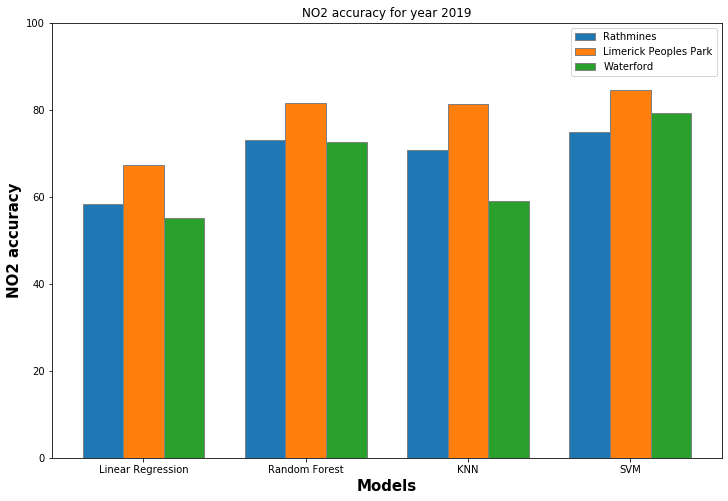

In [16]:
# NO2 accuracy for year 2019

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [Linear_regression(rathmines_2019,"","LinearRegression")*100,
    Linear_regression(rathmines_2019,"","KNeighborsRegressor")*100,
    Linear_regression(rathmines_2019,"","SVR")*100,
    Linear_regression(rathmines_2019,"","RandomForestRegressor")*100]
Limerick = [Linear_regression(Limerick_Peoples_Park_2019,"","LinearRegression")*100,
    Linear_regression(Limerick_Peoples_Park_2019,"","KNeighborsRegressor")*100,
    Linear_regression(Limerick_Peoples_Park_2019,"","SVR")*100,
    Linear_regression(Limerick_Peoples_Park_2019,"","RandomForestRegressor")*100]
Waterford = [Linear_regression(Waterford_2019,"","LinearRegression")*100,
    Linear_regression(Waterford_2019,"","KNeighborsRegressor")*100,
    Linear_regression(Waterford_2019,"","SVR")*100,
    Linear_regression(Waterford_2019,"","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','Random Forest','KNN','SVM'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2019")

plt.legend()
plt.show()


Original Data
LinearRegression
0.7440490159820177
R squared: 67.47
Mean Absolute Error: 2.6984768656298277
Mean Square Error: 13.4400585755642
Root Mean Square Error: 3.6660685448534918
Adjusted R squared: 0.6744248522201861 

Original Data
KNeighborsRegressor
0.7726979736072416
R squared: 82.18
Mean Absolute Error: 2.2295804195804196
Mean Square Error: 11.935693706293705
Root Mean Square Error: 3.454807332731263
Adjusted R squared: 0.8216802899205191 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7514737608663443
R squared: 73.23
Mean Absolute Error: 2.2571255123819673
Mean Square Error: 13.050183121336758
Root Mean Square Error: 3.6125037192142457
Adjusted R squared: 0.7320219981785627 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8026503170857943
R squared: 93.38
Mean Absolute Error: 2.0766212121212124
Mean Square Error: 10.36288767715618
Root Mean Square Error: 3.2191439354518123
Adjusted R squared: 0.9337826240360623 

Original Data
LinearRegression
0.6760656796661101
R squared: 67.01
Mean Absolute Error: 2.2261764483951376
Mean Square Error: 11.036034157055012
Root Mean Square Error: 3.322052702329542
Adjusted R squared: 0.6697921674996697 

Original Data
KNeighborsRegressor
0.8246078174632044
R squared: 85.81
Mean Absolute Error: 1.6168065268065268
Mean Square Error: 5.975390675990677
Root Mean Square Error: 2.4444612240718153
Adjusted R squared: 0.8579246111714837 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7642238858646553
R squared: 76.96
Mean Absolute Error: 1.6517947504966333
Mean Square Error: 8.032595145625086
Root Mean Square Error: 2.834183329572222
Adjusted R squared: 0.7693912646846559 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8484156779392582
R squared: 94.71
Mean Absolute Error: 1.526210955710956
Mean Square Error: 5.164286865967368
Root Mean Square Error: 2.2725067361764557
Adjusted R squared: 0.947090821090202 

Original Data
LinearRegression
0.5863268352054052
R squared: 57.08
Mean Absolute Error: 1.8208057379030456
Mean Square Error: 6.619518364203591
Root Mean Square Error: 2.572842467817179
Adjusted R squared: 0.5704466290540391 

Original Data
KNeighborsRegressor
0.7542790413325393
R squared: 82.10
Mean Absolute Error: 1.289090909090909
Mean Square Error: 3.931979487179488
Root Mean Square Error: 1.982921956905891
Adjusted R squared: 0.8208741882640331 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7497918783218347
R squared: 73.51
Mean Absolute Error: 1.176921743548667
Mean Square Error: 4.003782206041573
Root Mean Square Error: 2.0009453280990894
Adjusted R squared: 0.7348363539371408 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8258974134009059
R squared: 94.55
Mean Absolute Error: 1.0870885780885782
Mean Square Error: 2.7859560815850815
Root Mean Square Error: 1.6691183545767752
Adjusted R squared: 0.9454725269621399 



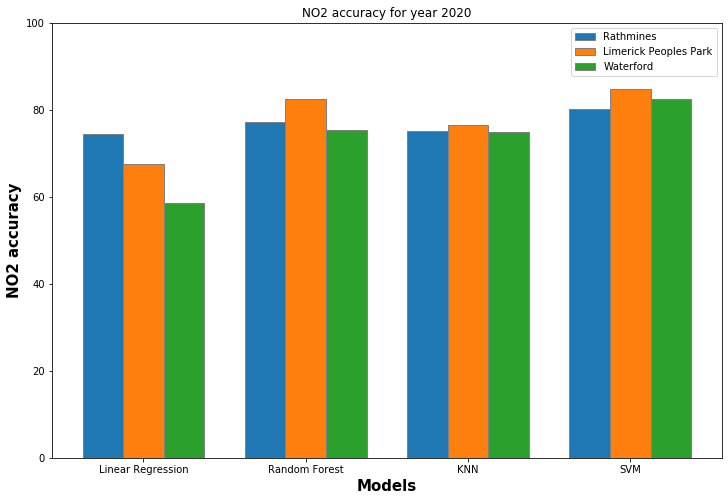

In [18]:
# NO2 accuracy for year 2020

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [Linear_regression(rathmines_2020,"","LinearRegression")*100,
    Linear_regression(rathmines_2020,"","KNeighborsRegressor")*100,
    Linear_regression(rathmines_2020,"","SVR")*100,
    Linear_regression(rathmines_2020,"","RandomForestRegressor")*100]
Limerick = [Linear_regression(Limerick_Peoples_Park_2020,"","LinearRegression")*100,
    Linear_regression(Limerick_Peoples_Park_2020,"","KNeighborsRegressor")*100,
    Linear_regression(Limerick_Peoples_Park_2020,"","SVR")*100,
    Linear_regression(Limerick_Peoples_Park_2020,"","RandomForestRegressor")*100]
Waterford = [Linear_regression(Waterford_2020,"","LinearRegression")*100,
    Linear_regression(Waterford_2020,"","KNeighborsRegressor")*100,
    Linear_regression(Waterford_2020,"","SVR")*100,
    Linear_regression(Waterford_2020,"","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','Random Forest','KNN','SVM'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2020")

plt.legend()
plt.show()


Original Data
LinearRegression
0.6595941687898673
R squared: 63.83
Mean Absolute Error: 3.744366787612108
Mean Square Error: 27.07212726204301
Root Mean Square Error: 5.203088242769193
Adjusted R squared: 0.6382274041858398 

Original Data
KNeighborsRegressor
0.7609149922518703
R squared: 82.24
Mean Absolute Error: 2.872681992337165
Mean Square Error: 19.014185900383143
Root Mean Square Error: 4.360525874293506
Adjusted R squared: 0.8223690976808635 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7373257868774361
R squared: 74.93
Mean Absolute Error: 2.961958099916938
Mean Square Error: 20.89021125411141
Root Mean Square Error: 4.570581063071894
Adjusted R squared: 0.7492301818644118 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7783673556277085
R squared: 92.65
Mean Absolute Error: 2.7588834482758617
Mean Square Error: 17.626217308145804
Root Mean Square Error: 4.198358882723796
Adjusted R squared: 0.9264952753175745 

Original Data
LinearRegression
0.6258439838908993
R squared: 64.91
Mean Absolute Error: 1.6519103648918994
Mean Square Error: 7.256106394604109
Root Mean Square Error: 2.693716093912666
Adjusted R squared: 0.649022960902771 

Original Data
KNeighborsRegressor
0.7879162175432226
R squared: 86.09
Mean Absolute Error: 1.0533333333333332
Mean Square Error: 4.112996781609196
Root Mean Square Error: 2.028052460270492
Adjusted R squared: 0.860883568492751 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.798910300735617
R squared: 80.76
Mean Absolute Error: 1.0380410371165731
Mean Square Error: 3.899785623908928
Root Mean Square Error: 1.9747874882905574
Adjusted R squared: 0.8075640123980281 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8107193858306346
R squared: 94.81
Mean Absolute Error: 0.969957471264404
Mean Square Error: 3.670768919157087
Root Mean Square Error: 1.9159250818226392
Adjusted R squared: 0.9481093464281338 

Original Data
LinearRegression
0.47834574314480105
R squared: 51.35
Mean Absolute Error: 1.9284660360452346
Mean Square Error: 7.995867308465933
Root Mean Square Error: 2.8276964668199334
Adjusted R squared: 0.5133925509827234 

Original Data
KNeighborsRegressor
0.7036366755844212
R squared: 79.03
Mean Absolute Error: 1.3800229885057471
Mean Square Error: 4.542629118773946
Root Mean Square Error: 2.1313444392622105
Adjusted R squared: 0.790255923744899 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6585177460424078
R squared: 68.46
Mean Absolute Error: 1.4055008973788015
Mean Square Error: 5.2342078205233395
Root Mean Square Error: 2.2878391159614653
Adjusted R squared: 0.684493013010143 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7758024305432509
R squared: 93.12
Mean Absolute Error: 1.1734801724137935
Mean Square Error: 3.436479224886965
Root Mean Square Error: 1.8537743187580749
Adjusted R squared: 0.9311761295858889 



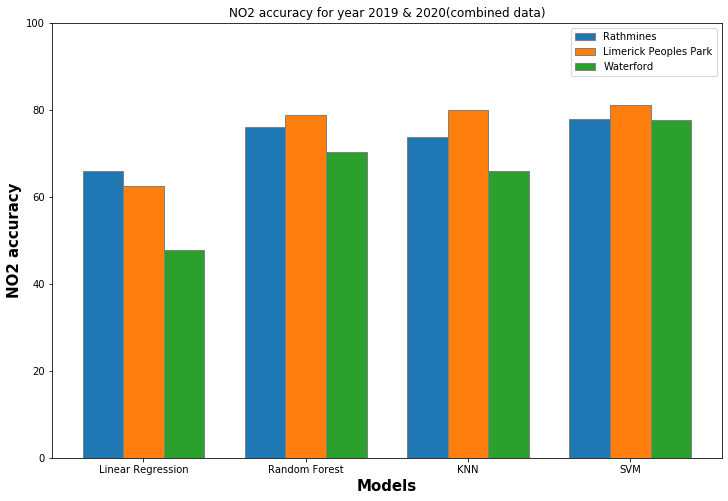

In [19]:
# NO2 accuracy for year 2019 & 2020(combined data)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [Linear_regression(df_Rathmines_locf,"","LinearRegression")*100,
    Linear_regression(df_Rathmines_locf,"","KNeighborsRegressor")*100,
    Linear_regression(df_Rathmines_locf,"","SVR")*100,
    Linear_regression(df_Rathmines_locf,"","RandomForestRegressor")*100]
Limerick = [Linear_regression(df_Limerick_Peoples_Park_locf,"","LinearRegression")*100,
    Linear_regression(df_Limerick_Peoples_Park_locf,"","KNeighborsRegressor")*100,
    Linear_regression(df_Limerick_Peoples_Park_locf,"","SVR")*100,
    Linear_regression(df_Limerick_Peoples_Park_locf,"","RandomForestRegressor")*100]
Waterford = [Linear_regression(df_Waterford_locf,"","LinearRegression")*100,
    Linear_regression(df_Waterford_locf,"","KNeighborsRegressor")*100,
    Linear_regression(df_Waterford_locf,"","SVR")*100,
    Linear_regression(df_Waterford_locf,"","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','Random Forest','KNN','SVM'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2019 & 2020(combined data)")

plt.legend()
plt.show()


# Plots after standard scaler

Standard Scaling
0.5839161686659481
R squared: -10191.29
Mean Absolute Error: 4.197483129298953
Mean Square Error: 33.422038897151204
Root Mean Square Error: 5.781179715002052
Adjusted R squared: -101.95988669398558 

Standard Scaling
0.7329073743723159
R squared: -145.38
Mean Absolute Error: 3.230296803652968
Mean Square Error: 21.454282648401826
Root Mean Square Error: 4.631876795468747
Adjusted R squared: -1.454912739178703 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7085254990527239
R squared: -202.43
Mean Absolute Error: 3.3147381450233184
Mean Square Error: 23.41276294479831
Root Mean Square Error: 4.838673676204907
Adjusted R squared: -2.025719208763055 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7487435096743469
R squared: -903.35
Mean Absolute Error: 3.075435083713851
Mean Square Error: 20.182241078442097
Root Mean Square Error: 4.492464922338526
Adjusted R squared: -9.038088170632323 

Standard Scaling
0.6735058491496628
R squared: -8511.79
Mean Absolute Error: 1.2450434053861674
Mean Square Error: 6.191501042941035
Root Mean Square Error: 2.488272702687757
Adjusted R squared: -85.15727676556197 

Standard Scaling
0.8228184501767141
R squared: -97.30
Mean Absolute Error: 0.7776027397260274
Mean Square Error: 3.3599981735159816
Root Mean Square Error: 1.833029779767907
Adjusted R squared: -0.9739044283383884 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8063787704024176
R squared: -797.26
Mean Absolute Error: 0.8140437061707277
Mean Square Error: 3.6717535118676063
Root Mean Square Error: 1.916182014284553
Adjusted R squared: -7.976685844782377 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8441887233741472
R squared: -1977.07
Mean Absolute Error: 0.7020707762557619
Mean Square Error: 2.9547410856164382
Root Mean Square Error: 1.7189360330205536
Adjusted R squared: -19.78017256398723 

Standard Scaling
0.5506326050460646
R squared: -8903.68
Mean Absolute Error: 1.7814445076893004
Mean Square Error: 7.601287491213606
Root Mean Square Error: 2.7570432516037187
Adjusted R squared: -89.07792785039807 

Standard Scaling
0.7179573167525051
R squared: -48.65
Mean Absolute Error: 1.328904109589041
Mean Square Error: 4.770901369863014
Root Mean Square Error: 2.184239311491077
Adjusted R squared: -0.48721343790238847 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5770590483432588
R squared: -393.29
Mean Absolute Error: 1.450426081699892
Mean Square Error: 7.154270206186018
Root Mean Square Error: 2.6747467555239726
Adjusted R squared: -3.935160558088934 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.790337093377588
R squared: -2103.29
Mean Absolute Error: 1.140693652152643
Mean Square Error: 3.546559112602724
Root Mean Square Error: 1.883231030065808
Adjusted R squared: -21.042968298279558 



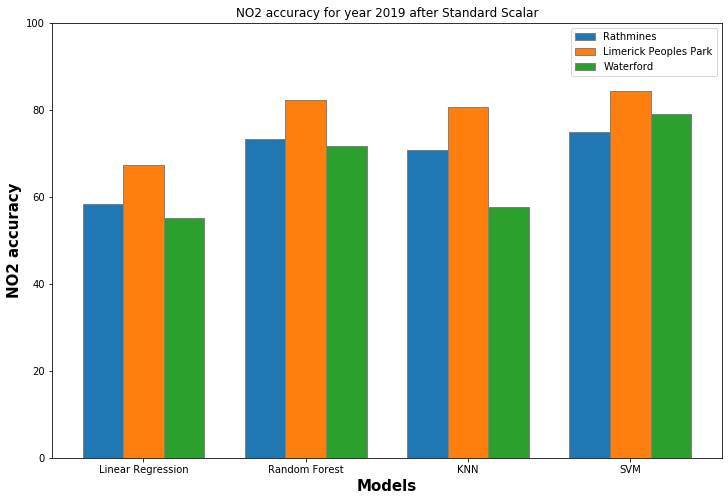

In [130]:
# NO2 accuracy for year 2019 after Standard Scalar

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [Linear_regression(rathmines_2019,"Standard Scaling","LinearRegression")*100,
    Linear_regression(rathmines_2019,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(rathmines_2019,"Standard Scaling","SVR")*100,
    Linear_regression(rathmines_2019,"Standard Scaling","RandomForestRegressor")*100]
Limerick = [Linear_regression(Limerick_Peoples_Park_2019,"Standard Scaling","LinearRegression")*100,
    Linear_regression(Limerick_Peoples_Park_2019,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(Limerick_Peoples_Park_2019,"Standard Scaling","SVR")*100,
    Linear_regression(Limerick_Peoples_Park_2019,"Standard Scaling","RandomForestRegressor")*100]
Waterford = [Linear_regression(Waterford_2019,"Standard Scaling","LinearRegression")*100,
    Linear_regression(Waterford_2019,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(Waterford_2019,"Standard Scaling","SVR")*100,
    Linear_regression(Waterford_2019,"Standard Scaling","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','Random Forest','KNN','SVM'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2019 after Standard Scalar")

plt.legend()
plt.show()


Standard Scaling
0.7440490159820176
R squared: -10296.23
Mean Absolute Error: 2.6984768656298277
Mean Square Error: 13.440058575564203
Root Mean Square Error: 3.666068544853492
Adjusted R squared: -103.05934914310772 

Standard Scaling
0.767674115777714
R squared: -39.96
Mean Absolute Error: 2.271445221445221
Mean Square Error: 12.1994979020979
Root Mean Square Error: 3.4927779634694645
Adjusted R squared: -0.4008755297546336 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.73513003151082
R squared: -266.87
Mean Absolute Error: 2.2864767417577703
Mean Square Error: 13.908396973196698
Root Mean Square Error: 3.729396328254306
Adjusted R squared: -2.6721572987565585 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8054607456035624
R squared: -722.33
Mean Absolute Error: 2.0684411421911424
Mean Square Error: 10.21531128065916
Root Mean Square Error: 3.1961400596124006
Adjusted R squared: -7.230962193183284 

Standard Scaling
0.6760656796661101
R squared: -9559.68
Mean Absolute Error: 2.2261764483951367
Mean Square Error: 11.036034157055012
Root Mean Square Error: 3.322052702329542
Adjusted R squared: -95.68699741381506 

Standard Scaling
0.821479944117594
R squared: -510.48
Mean Absolute Error: 1.5823776223776225
Mean Square Error: 6.081953379953381
Root Mean Square Error: 2.4661616694680384
Adjusted R squared: -5.110522268079603 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7532152168094312
R squared: -371.95
Mean Absolute Error: 1.665244447573518
Mean Square Error: 8.40764663011102
Root Mean Square Error: 2.8995942181814027
Adjusted R squared: -3.723930327903008 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8500747459452439
R squared: -1486.85
Mean Absolute Error: 1.5152692307692315
Mean Square Error: 5.107764509324012
Root Mean Square Error: 2.260036395575083
Adjusted R squared: -14.88330562940195 

Standard Scaling
0.5863268352054051
R squared: -10770.34
Mean Absolute Error: 1.8208057379030456
Mean Square Error: 6.619518364203592
Root Mean Square Error: 2.572842467817179
Adjusted R squared: -107.80491331502856 

Standard Scaling
0.7755205227853068
R squared: -156.11
Mean Absolute Error: 1.2126340326340328
Mean Square Error: 3.5920773892773887
Root Mean Square Error: 1.8952776549301131
Adjusted R squared: -1.5634512382653303 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7600971742728866
R squared: -307.42
Mean Absolute Error: 1.128727834054173
Mean Square Error: 3.8388788436723624
Root Mean Square Error: 1.9593057044964581
Adjusted R squared: -3.078023995290433 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8264612586481064
R squared: -714.39
Mean Absolute Error: 1.0845384615384617
Mean Square Error: 2.7769335384615386
Root Mean Square Error: 1.6664133756248893
Adjusted R squared: -7.15154051344156 



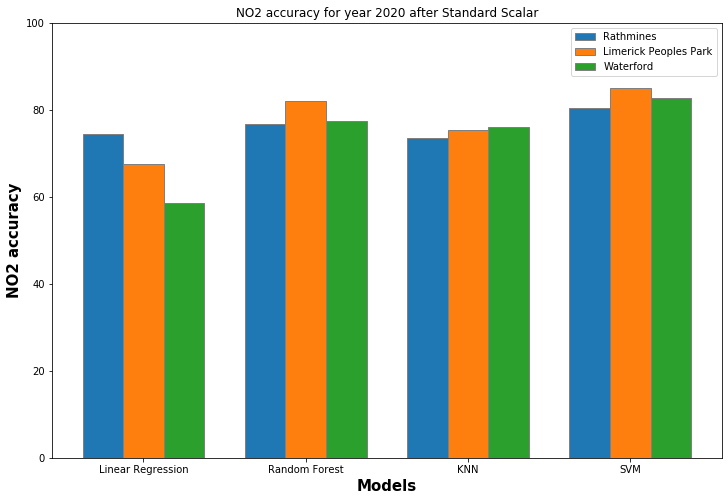

In [131]:
# NO2 accuracy for year 2020 after Standard Scalar

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [Linear_regression(rathmines_2020,"Standard Scaling","LinearRegression")*100,
    Linear_regression(rathmines_2020,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(rathmines_2020,"Standard Scaling","SVR")*100,
    Linear_regression(rathmines_2020,"Standard Scaling","RandomForestRegressor")*100]
Limerick = [Linear_regression(Limerick_Peoples_Park_2020,"Standard Scaling","LinearRegression")*100,
    Linear_regression(Limerick_Peoples_Park_2020,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(Limerick_Peoples_Park_2020,"Standard Scaling","SVR")*100,
    Linear_regression(Limerick_Peoples_Park_2020,"Standard Scaling","RandomForestRegressor")*100]
Waterford = [Linear_regression(Waterford_2020,"Standard Scaling","LinearRegression")*100,
    Linear_regression(Waterford_2020,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(Waterford_2020,"Standard Scaling","SVR")*100,
    Linear_regression(Waterford_2020,"Standard Scaling","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','Random Forest','KNN','SVM'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2020 after Standard Scalar")

plt.legend()
plt.show()


Standard Scaling
0.6595941687898673
R squared: -9852.54
Mean Absolute Error: 3.744366787612108
Mean Square Error: 27.07212726204301
Root Mean Square Error: 5.203088242769193
Adjusted R squared: -98.55588961501866 

Standard Scaling
0.7599137176398605
R squared: -112.67
Mean Absolute Error: 2.8778927203065137
Mean Square Error: 19.09381624521073
Root Mean Square Error: 4.369647153399314
Adjusted R squared: -1.127399342858106 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7352610511331065
R squared: -263.62
Mean Absolute Error: 2.94827925888586
Mean Square Error: 21.054417574062715
Root Mean Square Error: 4.58850929758922
Adjusted R squared: -2.6372688611844257 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7777013800904811
R squared: -695.81
Mean Absolute Error: 2.7560264133673904
Mean Square Error: 17.679181660821943
Root Mean Square Error: 4.204661896136471
Adjusted R squared: -6.960509436103335 

Standard Scaling
0.6258439838908997
R squared: -7439.22
Mean Absolute Error: 1.6519103648918996
Mean Square Error: 7.256106394604104
Root Mean Square Error: 2.6937160939126645
Adjusted R squared: -74.41529275171787 

Standard Scaling
0.7917864952870088
R squared: -244.33
Mean Absolute Error: 1.0371570881226053
Mean Square Error: 4.037939463601533
Root Mean Square Error: 2.0094624812624726
Adjusted R squared: -2.444326718675121 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7967682672997504
R squared: -861.41
Mean Absolute Error: 1.0347727112257235
Mean Square Error: 3.9413266438104078
Root Mean Square Error: 1.9852774727504485
Adjusted R squared: -8.617073608182562 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8105370372335025
R squared: -2661.84
Mean Absolute Error: 0.972783141762489
Mean Square Error: 3.6743052536398464
Root Mean Square Error: 1.9168477387731782
Adjusted R squared: -26.626848321822926 

Standard Scaling
0.4783457431448011
R squared: -8674.18
Mean Absolute Error: 1.9284660360452346
Mean Square Error: 7.9958673084659315
Root Mean Square Error: 2.827696466819933
Adjusted R squared: -86.76872398680088 

Standard Scaling
0.7186465663415338
R squared: -111.08
Mean Absolute Error: 1.3414482758620692
Mean Square Error: 4.3125589272030656
Root Mean Square Error: 2.0766701536842738
Adjusted R squared: -1.1114709749268923 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6585188446231376
R squared: -557.70
Mean Absolute Error: 1.3686458959753858
Mean Square Error: 5.2341909815814
Root Mean Square Error: 2.2878354358610236
Adjusted R squared: -5.578994381220364 

Standard Scaling


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7736426325183168
R squared: -2082.80
Mean Absolute Error: 1.1775556522532389
Mean Square Error: 3.4695844055569545
Root Mean Square Error: 1.8626820462862024
Adjusted R squared: -20.834676109425214 



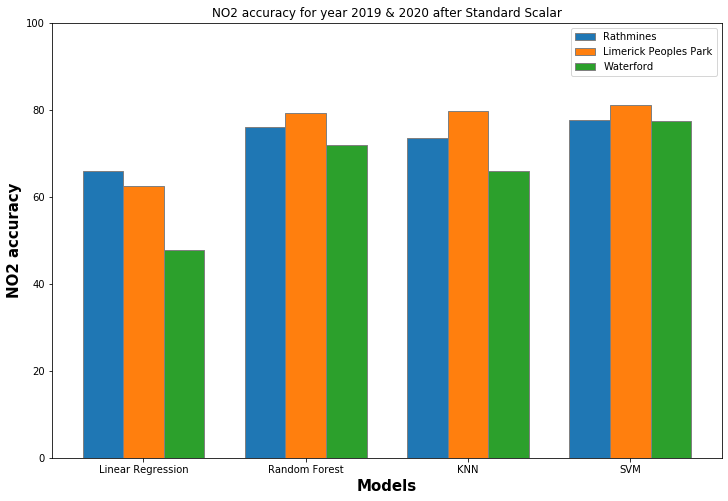

In [132]:
# NO2 accuracy for year 2019 & 2020 after Standard Scalar

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [Linear_regression(df_Rathmines_locf,"Standard Scaling","LinearRegression")*100,
    Linear_regression(df_Rathmines_locf,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(df_Rathmines_locf,"Standard Scaling","SVR")*100,
    Linear_regression(df_Rathmines_locf,"Standard Scaling","RandomForestRegressor")*100]
Limerick = [Linear_regression(df_Limerick_Peoples_Park_locf,"Standard Scaling","LinearRegression")*100,
    Linear_regression(df_Limerick_Peoples_Park_locf,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(df_Limerick_Peoples_Park_locf,"Standard Scaling","SVR")*100,
    Linear_regression(df_Limerick_Peoples_Park_locf,"Standard Scaling","RandomForestRegressor")*100]
Waterford = [Linear_regression(df_Waterford_locf,"Standard Scaling","LinearRegression")*100,
    Linear_regression(df_Waterford_locf,"Standard Scaling","KNeighborsRegressor")*100,
    Linear_regression(df_Waterford_locf,"Standard Scaling","SVR")*100,
    Linear_regression(df_Waterford_locf,"Standard Scaling","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','Random Forest','KNN','SVM'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2019 & 2020 after Standard Scalar")

plt.legend()
plt.show()


# Hyper Parameter Tuning

In [39]:
x = df_Rathmines_locf[['NO', 'O3', 'PM2.5', 'PM10']]
y = df_Rathmines_locf[['NO2']]

x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)

In [140]:
# Linear Regression
param_grid = {"n_jobs":[2,5,10,20]}
grid_search = GridSearchCV(estimator=LinearRegression(), cv=10, param_grid=param_grid, verbose=True, n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


{'n_jobs': 2}

In [138]:
# Random Forest Regressor
param_grid = {'n_estimators':[2,5,10,20],'min_samples_split':[2,3], 'min_samples_leaf':[1,2,3]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), cv=10, param_grid=param_grid, verbose=True, n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.0s finished
C:\Users\vedan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}

In [43]:
# SVR
param_grid = {'gamma':['scale', 'auto'], 'max_iter':[1, 100, 10000, 50000]}
grid_search = GridSearchCV(estimator=SVR(), cv=10, param_grid=param_grid, verbose=True, n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  65 out of  80 | elapsed:   23.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   30.8s finished
C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'gamma': 'scale', 'max_iter': 10000}

In [146]:
# KNeighborsRegressor
param_grid = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), cv=10, param_grid=param_grid, verbose=True, n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


{'n_neighbors': 6, 'weights': 'distance'}

# Models After Hyper Parameter Tuning

In [44]:
# Random Forest

def HyperParameterTuning(df,scaling,modelName):
    # Split the dataset into 20% test and 80% training data
    x = df[['NO', 'O3', 'PM2.5', 'PM10']]
    y = df[['NO2']]
    
    
    if(scaling == "Standard Scaling"):
        print("Standard Scaling")
       # standard scaling
        scaler = StandardScaler()
        scaled_x = scaler.fit_transform(x)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(scaled_x, y, test_size=0.2,random_state=4)
    elif(scaling == "Normalizing"):
        print("Normalizing")
        # Normalizing
        normalized_x = normalize(x)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(normalized_x, y, test_size=0.2,random_state=4)
    else:
        print("Original Data")
         #     train_x, test_x, train_y, test_y
        x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2,random_state=4)

    if(modelName == "RandomForestRegressor"):
        print("RandomForestRegressor")
        model = RandomForestRegressor(min_samples_leaf= 3, min_samples_split= 3, n_estimators= 20)
    elif(modelName == "SVR"):
        print("SVR")
        model = SVR(gamma= 'scale', max_iter= 10000)
    elif(modelName == "KNeighborsRegressor"):
        print("KNeighborsRegressor")
        model = KNeighborsRegressor(n_neighbors= 6, weights= 'distance')
    else:
        print("LinearRegression")
        model = LinearRegression(n_jobs= 2)
    
    
    model.fit(x_train, y_train)
    print(model.score(x_test,y_test))
    Evaluation(model, x_test, y_test,x,y)
    return model.score(x_test,y_test)

# Plots After Hyper Parameter Tuning

Original Data
LinearRegression
0.5839161686659482
R squared: 61.54
Mean Absolute Error: 4.197483129298954
Mean Square Error: 33.422038897151204
Root Mean Square Error: 5.781179715002052
Adjusted R squared: 0.6152156521870801 

Original Data
KNeighborsRegressor
0.7362550172235445
R squared: 94.58
Mean Absolute Error: 3.148697783815488
Mean Square Error: 21.18538239042063
Root Mean Square Error: 4.602758128602961
Adjusted R squared: 0.9457763461315372 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7072174833825524
R squared: 72.81
Mean Absolute Error: 3.3237615744312317
Mean Square Error: 23.517829634043082
Root Mean Square Error: 4.849518495071761
Adjusted R squared: 0.7279264994969638 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7502988684095931
R squared: 87.88
Mean Absolute Error: 3.0828392406894065
Mean Square Error: 20.057306494991078
Root Mean Square Error: 4.478538432903203
Adjusted R squared: 0.8787410975877372 

Original Data
LinearRegression
0.6735058491496628
R squared: 66.93
Mean Absolute Error: 1.245043405386168
Mean Square Error: 6.191501042941036
Root Mean Square Error: 2.488272702687757
Adjusted R squared: 0.6691813210142479 

Original Data
KNeighborsRegressor
0.8221309494789147
R squared: 96.40
Mean Absolute Error: 0.7758469521898952
Mean Square Error: 3.3730356545133002
Root Mean Square Error: 1.8365826021481584
Adjusted R squared: 0.9639620872323685 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8144039375183962
R squared: 80.98
Mean Absolute Error: 0.8065141089326304
Mean Square Error: 3.51956753720635
Root Mean Square Error: 1.8760510486674795
Adjusted R squared: 0.8097448160969837 

Original Data
RandomForestRegressor
0.8473393507712847


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R squared: 91.91
Mean Absolute Error: 0.6875816425071593
Mean Square Error: 2.8949938810662457
Root Mean Square Error: 1.701468154584812
Adjusted R squared: 0.919059680259426 

Original Data
LinearRegression
0.5506326050460646
R squared: 51.93
Mean Absolute Error: 1.7814445076893008
Mean Square Error: 7.601287491213606
Root Mean Square Error: 2.7570432516037187
Adjusted R squared: 0.5190550354520673 

Original Data
KNeighborsRegressor
0.7351154084423585
R squared: 94.09
Mean Absolute Error: 1.3049221361871213
Mean Square Error: 4.480663161217396
Root Mean Square Error: 2.1167577001672617
Adjusted R squared: 0.9408897037360736 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5899444641765373
R squared: 60.79
Mean Absolute Error: 1.4704681535812325
Mean Square Error: 6.936306572659322
Root Mean Square Error: 2.6336868782486884
Adjusted R squared: 0.6077631055283426 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7926437719987045
R squared: 87.70
Mean Absolute Error: 1.1291001651073544
Mean Square Error: 3.5075404220038204
Root Mean Square Error: 1.8728428716803287
Adjusted R squared: 0.876956382876733 



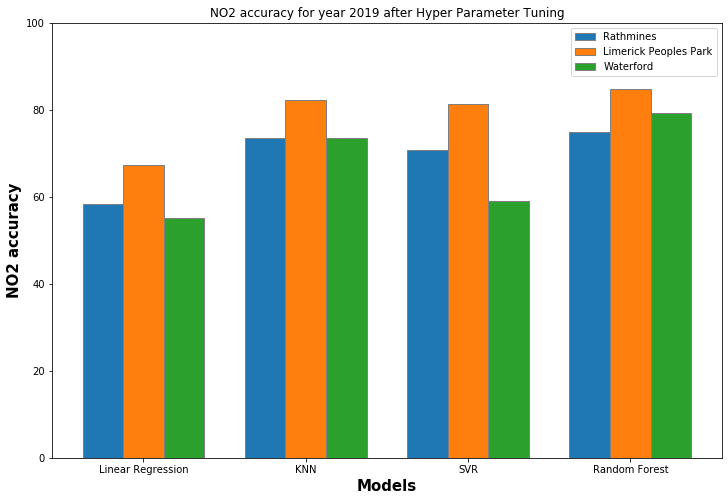

In [49]:
# NO2 accuracy for year 2019

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [HyperParameterTuning(rathmines_2019,"","LinearRegression")*100,
    HyperParameterTuning(rathmines_2019,"","KNeighborsRegressor")*100,
    HyperParameterTuning(rathmines_2019,"","SVR")*100,
    HyperParameterTuning(rathmines_2019,"","RandomForestRegressor")*100]
Limerick = [HyperParameterTuning(Limerick_Peoples_Park_2019,"","LinearRegression")*100,
    HyperParameterTuning(Limerick_Peoples_Park_2019,"","KNeighborsRegressor")*100,
    HyperParameterTuning(Limerick_Peoples_Park_2019,"","SVR")*100,
    HyperParameterTuning(Limerick_Peoples_Park_2019,"","RandomForestRegressor")*100]
Waterford = [HyperParameterTuning(Waterford_2019,"","LinearRegression")*100,
    HyperParameterTuning(Waterford_2019,"","KNeighborsRegressor")*100,
    HyperParameterTuning(Waterford_2019,"","SVR")*100,
    HyperParameterTuning(Waterford_2019,"","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','KNN','SVR','Random Forest'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2019 after Hyper Parameter Tuning")

plt.legend()
plt.show()


Original Data
LinearRegression
0.7440490159820177
R squared: 67.47
Mean Absolute Error: 2.6984768656298277
Mean Square Error: 13.4400585755642
Root Mean Square Error: 3.6660685448534918
Adjusted R squared: 0.6744248522201861 

Original Data
KNeighborsRegressor
0.7788845045118361
R squared: 95.31
Mean Absolute Error: 2.1945049079499337
Mean Square Error: 11.61083721841458
Root Mean Square Error: 3.407467860217405
Adjusted R squared: 0.9530734091175431 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7514737608663443
R squared: 73.23
Mean Absolute Error: 2.2571255123819673
Mean Square Error: 13.050183121336758
Root Mean Square Error: 3.6125037192142457
Adjusted R squared: 0.7320219981785627 

Original Data
RandomForestRegressor
0.8068347326805703
R squared: 89.18
Mean Absolute Error: 2.0641590680721205
Mean Square Error: 10.143162830564673
Root Mean Square Error: 3.184833250040679
Adjusted R squared: 0.8916729525249987 



C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Original Data
LinearRegression
0.6760656796661101
R squared: 67.01
Mean Absolute Error: 2.2261764483951376
Mean Square Error: 11.036034157055012
Root Mean Square Error: 3.322052702329542
Adjusted R squared: 0.6697921674996697 

Original Data
KNeighborsRegressor
0.8319319296789041
R squared: 96.28
Mean Absolute Error: 1.5687714854960946
Mean Square Error: 5.725867400719161
Root Mean Square Error: 2.39287847596136
Adjusted R squared: 0.9627637108442144 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7642238858646553
R squared: 76.96
Mean Absolute Error: 1.6517947504966333
Mean Square Error: 8.032595145625086
Root Mean Square Error: 2.834183329572222
Adjusted R squared: 0.7693912646846559 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8460680366829926
R squared: 91.21
Mean Absolute Error: 1.5062312105166935
Mean Square Error: 5.244268045689093
Root Mean Square Error: 2.290036690904557
Adjusted R squared: 0.9120265858432448 

Original Data
LinearRegression
0.5863268352054052
R squared: 57.08
Mean Absolute Error: 1.8208057379030456
Mean Square Error: 6.619518364203591
Root Mean Square Error: 2.572842467817179
Adjusted R squared: 0.5704466290540391 

Original Data
KNeighborsRegressor
0.765252568444113
R squared: 95.51
Mean Absolute Error: 1.2411480851939216
Mean Square Error: 3.7563832183927133
Root Mean Square Error: 1.9381391122395506
Adjusted R squared: 0.9550214143814937 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7497918783218347
R squared: 73.51
Mean Absolute Error: 1.176921743548667
Mean Square Error: 4.003782206041573
Root Mean Square Error: 2.0009453280990894
Adjusted R squared: 0.7348363539371408 

Original Data
RandomForestRegressor
0.8287275050872369
R squared: 90.77
Mean Absolute Error: 1.082176633066493
Mean Square Error: 2.7406694991224505
Root Mean Square Error: 1.6554967529785283
Adjusted R squared: 0.9076264165524316 



C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


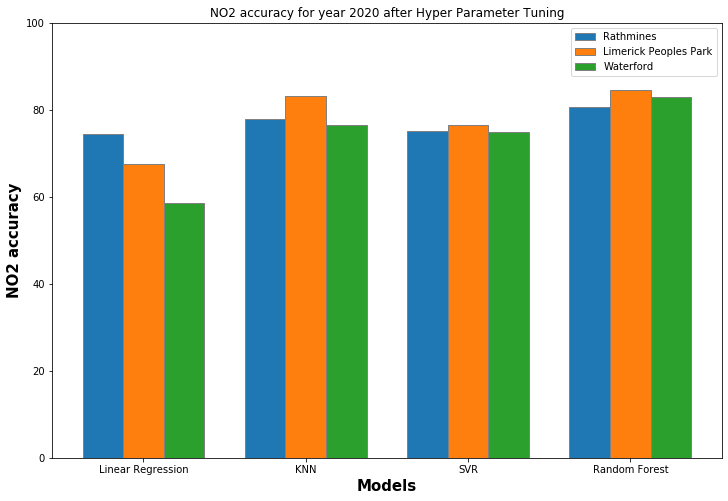

In [50]:
# NO2 accuracy for year 2020

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [HyperParameterTuning(rathmines_2020,"","LinearRegression")*100,
    HyperParameterTuning(rathmines_2020,"","KNeighborsRegressor")*100,
    HyperParameterTuning(rathmines_2020,"","SVR")*100,
    HyperParameterTuning(rathmines_2020,"","RandomForestRegressor")*100]
Limerick = [HyperParameterTuning(Limerick_Peoples_Park_2020,"","LinearRegression")*100,
    HyperParameterTuning(Limerick_Peoples_Park_2020,"","KNeighborsRegressor")*100,
    HyperParameterTuning(Limerick_Peoples_Park_2020,"","SVR")*100,
    HyperParameterTuning(Limerick_Peoples_Park_2020,"","RandomForestRegressor")*100]
Waterford = [HyperParameterTuning(Waterford_2020,"","LinearRegression")*100,
    HyperParameterTuning(Waterford_2020,"","KNeighborsRegressor")*100,
    HyperParameterTuning(Waterford_2020,"","SVR")*100,
    HyperParameterTuning(Waterford_2020,"","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','KNN','SVR','Random Forest'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2020 after Hyper Parameter Tuning")

plt.legend()
plt.show()


Original Data
LinearRegression
0.6595941687898673
R squared: 63.83
Mean Absolute Error: 3.744366787612108
Mean Square Error: 27.07212726204301
Root Mean Square Error: 5.203088242769193
Adjusted R squared: 0.6382274041858398 

Original Data
KNeighborsRegressor
0.7674710934716632
R squared: 94.86
Mean Absolute Error: 2.81894850941135
Mean Square Error: 18.49278588225154
Root Mean Square Error: 4.300323927595634
Adjusted R squared: 0.9486038632996041 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7373257868774361
R squared: 74.93
Mean Absolute Error: 2.961958099916938
Mean Square Error: 20.89021125411141
Root Mean Square Error: 4.570581063071894
Adjusted R squared: 0.7492301818644118 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7774357896659849
R squared: 88.52
Mean Absolute Error: 2.778153679274899
Mean Square Error: 17.700303795381092
Root Mean Square Error: 4.207172898203863
Adjusted R squared: 0.8851973901152012 

Original Data
LinearRegression
0.6258439838908993
R squared: 64.91
Mean Absolute Error: 1.6519103648918994
Mean Square Error: 7.256106394604109
Root Mean Square Error: 2.693716093912666
Adjusted R squared: 0.649022960902771 

Original Data
KNeighborsRegressor
0.7967097234441171
R squared: 96.53
Mean Absolute Error: 1.0275014811406233
Mean Square Error: 3.942462000257815
Root Mean Square Error: 1.9855633961820043
Adjusted R squared: 0.9652463686863941 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.798910300735617
R squared: 80.76
Mean Absolute Error: 1.0380410371165731
Mean Square Error: 3.899785623908928
Root Mean Square Error: 1.9747874882905574
Adjusted R squared: 0.8075640123980281 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8045730261151925
R squared: 91.49
Mean Absolute Error: 0.989258907881134
Mean Square Error: 3.789966895708541
Root Mean Square Error: 1.9467837311084508
Adjusted R squared: 0.9149078855988553 

Original Data
LinearRegression
0.47834574314480105
R squared: 51.35
Mean Absolute Error: 1.9284660360452346
Mean Square Error: 7.995867308465933
Root Mean Square Error: 2.8276964668199334
Adjusted R squared: 0.5133925509827234 

Original Data
KNeighborsRegressor
0.7144647019488136
R squared: 94.41
Mean Absolute Error: 1.3503952869908644
Mean Square Error: 4.376658150676804
Root Mean Square Error: 2.0920464026108037
Adjusted R squared: 0.944106138870746 

Original Data
SVR


C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6585177460424078
R squared: 68.46
Mean Absolute Error: 1.4055008973788015
Mean Square Error: 5.2342078205233395
Root Mean Square Error: 2.2878391159614653
Adjusted R squared: 0.684493013010143 

Original Data
RandomForestRegressor


C:\Users\vedan\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7826586647078431
R squared: 88.59
Mean Absolute Error: 1.1586819163834252
Mean Square Error: 3.3313875134796023
Root Mean Square Error: 1.8252088958471582
Adjusted R squared: 0.8858819267299238 



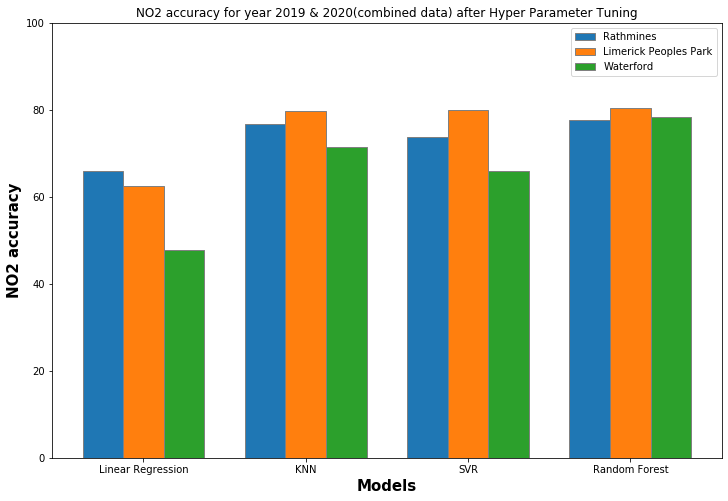

In [51]:
# NO2 accuracy for year 2019 & 2020(combined data)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Rathmines = [HyperParameterTuning(df_Rathmines_locf,"","LinearRegression")*100,
    HyperParameterTuning(df_Rathmines_locf,"","KNeighborsRegressor")*100,
    HyperParameterTuning(df_Rathmines_locf,"","SVR")*100,
    HyperParameterTuning(df_Rathmines_locf,"","RandomForestRegressor")*100]
Limerick = [HyperParameterTuning(df_Limerick_Peoples_Park_locf,"","LinearRegression")*100,
    HyperParameterTuning(df_Limerick_Peoples_Park_locf,"","KNeighborsRegressor")*100,
    HyperParameterTuning(df_Limerick_Peoples_Park_locf,"","SVR")*100,
    HyperParameterTuning(df_Limerick_Peoples_Park_locf,"","RandomForestRegressor")*100]
Waterford = [HyperParameterTuning(df_Waterford_locf,"","LinearRegression")*100,
    HyperParameterTuning(df_Waterford_locf,"","KNeighborsRegressor")*100,
    HyperParameterTuning(df_Waterford_locf,"","SVR")*100,
    HyperParameterTuning(df_Waterford_locf,"","RandomForestRegressor")*100]

# Set position of bar on X axis
br1 = np.arange(len(Rathmines))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Rathmines, width = barWidth,
		edgecolor ='grey', label ='Rathmines') # , color ='r'
plt.bar(br2, Limerick, width = barWidth,
		edgecolor ='grey', label ='Limerick Peoples Park') # , color ='g'
plt.bar(br3, Waterford, width = barWidth,
		edgecolor ='grey', label ='Waterford') # , color ='b'

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('NO2 accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rathmines))],
		['Linear Regression','KNN','SVR','Random Forest'])
plt.ylim(0,100)
plt.title("NO2 accuracy for year 2019 & 2020(combined data) after Hyper Parameter Tuning")

plt.legend()
plt.show()
